**Question 1**

Given two strings s1 and s2, return *the lowest **ASCII** sum of deleted characters to make two strings equal*.

**Example 1:**

**Input:** s1 = "sea", s2 = "eat"

**Output:** 231

**Explanation:** Deleting "s" from "sea" adds the ASCII value of "s" (115) to the sum.

Deleting "t" from "eat" adds 116 to the sum.

At the end, both strings are equal, and 115 + 116 = 231 is the minimum sum possible to achieve this.


**Algorithm**
- We need to make sure that in minimumDeleteSum(s1, s2), second argument is the smaller string. So, if s1.length() < s2.length(), call minimumDeleteSum(s2, s1).
- Save the length of s1 and s2 as m and n respectively.
- Declare the currRow array of size n + 1. Initialize currRow[0] as 0.
- Compute the currRow array for i == 0. Traverse j, the pointer for s2, from 1 to n. For each j, compute currRow[j] as currRow[j - 1] + ASCII(s2[j - 1]).
- Traverse row-by-row using i pointer for s1, from 1 to m. For each i
- Save currRow[0] as diag. This is the top-left-diagonal value for computing currRow[1].
- Update currRow[0] as currRow[0] + ASCII(s1[i - 1]).
- Traverse all columns using the j pointer for s2, from 1 to n. For each j, initialize an answer variable.
- If s1[i - 1] == s2[j - 1], then answer = diag. The two-dimensional equation for this was computeCost[i][j] = computeCost[i - 1][j - 1].
- Otherwise, answer = min(ASCII(s1[i - 1]) + currRow[j], ASCII(s2[j - 1]) + currRow[j - 1]). The two-dimensional equation for this was computeCost[i][j] = min(ASCII(s1[i - 1]) + computeCost[i - 1][j], ASCII(s2[j - 1]) + computeCost[i][j - 1]).
- Save currRow[j] as diag. This will serve as the top-left-diagonal value for computing currRow[j + 1].
- Overwrite currRow[j] with answer.
- Return currRow[n] as answer.

In [1]:
def minimumDeleteSum(s1: str, s2: str) -> int:
    
    # Make sure s2 is smaller string
    if len(s1) < len(s2):
        return minimumDeleteSum(s1 = s2, s2 = s1)
    
    # Case for empty s1
    m, n = len(s1), len(s2)
    curr_row = [0] * (n + 1)
    for j in range(1, n + 1):
        curr_row[j] = curr_row[j - 1] + ord(s2[j - 1])
    
    # Compute answer row-by-row
    for i in range(1, m + 1):
        
        diag = curr_row[0]
        curr_row[0] += ord(s1[i - 1])

        for j in range(1, n + 1):
            
            # If characters are the same, the answer is top-left-diagonal value
            if s1[i - 1] == s2[j - 1]:
                answer = diag
            
            # Otherwise, the answer is minimum of top and left values with
            # deleted character's ASCII value
            else:
                answer = min(
                    ord(s1[i - 1]) + curr_row[j],
                    ord(s2[j - 1]) + curr_row[j - 1]
                )

            # Before overwriting curr_row[j] with the answer, save it in diag
            # for the next column
            diag = curr_row[j]
            curr_row[j] = answer
    
    # Return answer
    return curr_row[-1]

s1 = "delete"
s2 = "leet"

minimumDeleteSum(s1,s2)

# tc = O(m*n)
# sc = O(min(m,n))

403

**Question 2**

Given a string s containing only three types of characters: '(', ')' and '*', return true *if* s *is **valid***.

The following rules define a **valid** string:

- Any left parenthesis '(' must have a corresponding right parenthesis ')'.
- Any right parenthesis ')' must have a corresponding left parenthesis '('.
- Left parenthesis '(' must go before the corresponding right parenthesis ')'.
- '*' could be treated as a single right parenthesis ')' or a single left parenthesis '(' or an empty string "".

**Example 1:**

**Input:** s = "()"

**Output:**

true


**Intuition**

- When checking whether the string is valid, we only cared about the "balance": the number of extra, open left brackets as we parsed through the string. For example, when checking whether '(()())' is valid, we had a balance of 1, 2, 1, 2, 1, 0 as we parse through the string: '(' has 1 left bracket, '((' has 2, '(()' has 1, and so on. This means that after parsing the first i symbols, (which may include asterisks,) we only need to keep track of what the balance could be.

- For example, if we have string '(***)', then as we parse each symbol, the set of possible values for the balance is [1] for '('; [0, 1, 2] for '(*'; [0, 1, 2, 3] for '(**'; [0, 1, 2, 3, 4] for '(***', and [0, 1, 2, 3] for '(***)'.

- Furthermore, we can prove these states always form a contiguous interval. Thus, we only need to know the left and right bounds of this interval. That is, we would keep those intermediate states described above as [lo, hi] = [1, 1], [0, 2], [0, 3], [0, 4], [0, 3].

**Algorithm**

- Let lo, hi respectively be the smallest and largest possible number of open left brackets after processing the current character in the string.
- If we encounter a left bracket (c == '('), then lo++, otherwise we could write a right bracket, so lo--. 
- If we encounter what can be a left bracket (c != ')'), then hi++, otherwise we must write a right bracket, so hi--. 
- If hi < 0, then the current prefix can't be made valid no matter what our choices are. 
- Also, we can never have less than 0 open left brackets. At the end, we should check that we can have exactly 0 open left brackets.

In [4]:
def checkValidString(s):
    lo = hi = 0
    for c in s:
        lo += 1 if c == '(' else -1
        hi += 1 if c != ')' else -1
        if hi < 0: break
        lo = max(lo, 0)

    return lo == 0

# s = "()"
s = "(*)"
# s = "(*))"
checkValidString(s)


# tc = O(n)
# sc = O(1)

True

**Question 3**

Given two strings word1 and word2, return *the minimum number of **steps** required to make* word1 *and* word2 *the same*.

In one **step**, you can delete exactly one character in either string.

**Example 1:**

**Input:** word1 = "sea", word2 = "eat"

**Output:** 2

**Explanation:** You need one step to make "sea" to "ea" and another step to make "eat" to "ea".

**algorithm**

- Get the lengths of the two input strings and store them in variables m and n.
- Initialize a dynamic programming table dp of size (m + 1) x (n + 1) with all entries initialized to 0.
- Use a nested loop to iterate over all entries of the dynamic programming table dp.
- If the characters word1[i-1] and word2[j-1] are the same, set dp[i][j] to be one greater than dp[i-1][j-1].
- Otherwise, set dp[i][j] to be the maximum of dp[i-1][j] and dp[i][j-1].
- After the loop completes, return the minimum number of deletions required to convert word1 to word2. This is equal to m + n - 2 * dp[m][n].

In [7]:
def minDistance(word1: str, word2: str) -> int:
    m, n = len(word1), len(word2)
    dp = [[0] * (n + 1) for _ in range(m + 1)]
    
    # fill in the dynamic programming table
    for i in range(1, m + 1):
        for j in range(1, n + 1):
            if word1[i - 1] == word2[j - 1]:
                dp[i][j] = dp[i - 1][j - 1] + 1
            else:
                dp[i][j] = max(dp[i - 1][j], dp[i][j - 1])
    
    # return the minimum number of deletions required
    return m + n - 2 * dp[m][n]


word1 = "leetcode"
word2 = "etco"

minDistance(word1, word2)

# tc = O(m*n)
# sc = O(m*n)

4

**Question 4**

You need to construct a binary tree from a string consisting of parenthesis and integers.

The whole input represents a binary tree. It contains an integer followed by zero, one or two pairs of parenthesis. The integer represents the root's value and a pair of parenthesis contains a child binary tree with the same structure.
You always start to construct the **left** child node of the parent first if it exists.

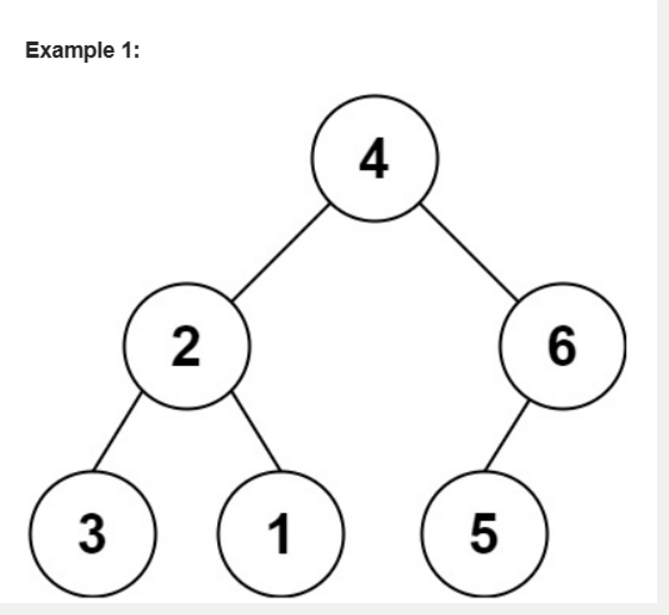

**Input:** s = "4(2(3)(1))(6(5))"

**Output:** [4,2,6,3,1,5]

In [ ]:
# Definition for a binary tree node.
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

class Solution:
    def str2tree(self, s: str) -> TreeNode:
        def dfs(s):
            if not s:
                return None
            p = s.find('(')
            if p == -1:
                return TreeNode(int(s))
            root = TreeNode(int(s[:p]))
            start = p
            cnt = 0
            for i in range(p, len(s)):
                if s[i] == '(':
                    cnt += 1
                elif s[i] == ')':
                    cnt -= 1
                if cnt == 0:
                    if start == p:
                        root.left = dfs(s[start + 1 : i])
                        start = i + 1
                    else:
                        root.right = dfs(s[start + 1 : i])

            return root
            # print(root)

        return dfs(s)
    

s = "4(2(3)(1))(6(5))"
obj = Solution()
res = obj.str2tree(s)
print(res)

**Question 5**

Given an array of characters chars, compress it using the following algorithm:

Begin with an empty string s. For each group of **consecutive repeating characters** in chars:

- If the group's length is 1, append the character to s.
- Otherwise, append the character followed by the group's length.

The compressed string s **should not be returned separately**, but instead, be stored **in the input character array chars**. Note that group lengths that are 10 or longer will be split into multiple characters in chars.

After you are done **modifying the input array,** return *the new length of the array*.

You must write an algorithm that uses only constant extra space.

**Example 1:**

**Input:** chars = ["a","a","b","b","c","c","c"]

**Output:** Return 6, and the first 6 characters of the input array should be: ["a","2","b","2","c","3"]

**Explanation:**

The groups are "aa", "bb", and "ccc". This compresses to "a2b2c3".

**Algorithm**

1. Declare the variables i – the first index of the current group, and res – the length of the answer (of the compressed string). Initialize i = 0, res = 0.
2. While i is less than the length of chars:
    - Find the length of the current group of consecutive repeating characters groupLength.
    - Add chars[i] to the answer (chars[res++] = chars[i]).
    - If groupLength > 1, add the string representation of groupLength to the answer and increase res accordingly.
    - Increase i by groupLength and proceed to the next group.
3. Return res.

In [23]:
def compress(chars: list[str]) -> int:
    i = 0
    res = 0
    while i < len(chars):
        group_length = 1
        while (i + group_length < len(chars)
                and chars[i + group_length] == chars[i]):
            group_length += 1
        chars[res] = chars[i]
        res += 1
        if group_length > 1:
            str_repr = str(group_length)
            chars[res:res+len(str_repr)] = list(str_repr)
            res += len(str_repr)
        i += group_length
    return res


chars = ["a","a","b","b","c","c","c"]
compress(chars)

# tc = O(n)
# sc = O(1)

6

**Question 6**

Given two strings s and p, return *an array of all the start indices of* p*'s anagrams in* s. You may return the answer in **any order**.

An **Anagram** is a word or phrase formed by rearranging the letters of a different word or phrase, typically using all the original letters exactly once.

**Example 1:**

**Input:** s = "cbaebabacd", p = "abc"

**Output:** [0,6]

**Explanation:**

The substring with start index = 0 is "cba", which is an anagram of "abc".

The substring with start index = 6 is "bac", which is an anagram of "abc".

In [25]:
from collections import Counter

def findAnagrams(s: str, p: str) :
    ans = []
    count = Counter(p)
    required = len(p)

    for r, c in enumerate(s):
        count[c] -= 1
        if count[c] >= 0:
            required -= 1
        if r >= len(p):
            left_char = s[r - len(p)]
            count[left_char] += 1
            if count[left_char] > 0:
                required += 1
        if required == 0:
            ans.append(r - len(p) + 1)

    return ans

s = "cbaebabacd"
p = "abc"

findAnagrams(s,p)

# tc = O(n)
# sc = O(n)

[0, 6]

**Question 7**

Given an encoded string, return its decoded string.

The encoding rule is: k[encoded_string], where the encoded_string inside the square brackets is being repeated exactly k times. Note that k is guaranteed to be a positive integer.

You may assume that the input string is always valid; there are no extra white spaces, square brackets are well-formed, etc. Furthermore, you may assume that the original data does not contain any digits and that digits are only for those repeat numbers, k. For example, there will not be input like 3a or 2[4].

The test cases are generated so that the length of the output will never exceed 105.

**Example 1:**

**Input:** s = "3[a]2[bc]"

**Output:** "aaabcbc"

**Approach**

- We initialize an empty stack to store characters.
- We iterate through each character in the given string.
- If the current character is not ']', we push it onto the stack.
- If the current character is ']', we start the decoding process:
-->We pop characters from the stack until we encounter a '['. These characters represent a substring that needs to be repeated.
-->After popping the substring, we pop the next characters from the stack until we reach a digit. These characters represent the number that specifies the repetition count.
-->We reverse the extracted number and convert it to an integer.
-->We multiply the substring by the repetition count and push the result back onto the stack.

- Once we have processed all the characters in the input string, we join the remaining characters in the stack to obtain the final decoded string. Since the characters were pushed onto the stack in reverse order, we reverse each substring before joining them to maintain the original order.

In [26]:
def decodeString(s: str):

    stack=[]

    for c in s:
        if c!=']':
            stack.append(c)
        else:
            res=''
            while stack[-1]!='[':
                res+=stack.pop()
            stack.pop()
            n=''
            while len(stack)!=0 and stack[-1].isdigit()==True:
                n+=stack.pop()
            stack.append(res*int(n[::-1]))

    return ''.join([word[::-1] for word in stack])


s = "3[a]2[bc]"
decodeString(s)

'aaabcbc'

**Question 8**

Given two strings s and goal, return true *if you can swap two letters in* s *so the result is equal to* goal*, otherwise, return* false*.*

Swapping letters is defined as taking two indices i and j (0-indexed) such that i != j and swapping the characters at s[i] and s[j].

- For example, swapping at indices 0 and 2 in "abcd" results in "cbad".

**Example 1:**

**Input:** s = "ab", goal = "ba"

**Output:** true

**Explanation:** You can swap s[0] = 'a' and s[1] = 'b' to get "ba", which is equal to goal.

**Algorithm**

1. If the number of characters in string s and goal is different then they can never become equal, thus we return false.
2. If s == goal:
    - We can use a hash map or create an array of size 26 frequency to store the frequency of each character of string s.
    - If any character has a frequency of more than 1 then we can swap those two same characters, thus we will return true. Otherwise, we return false.
3. Otherwise s != goal. We keep two variables firstIndex and secondIndex both initialized to -1, to store the indices of string s having different characters than string goal at the same index.
4. We iterate over each index i in string s:
    - If characters at s[i] and goal[i] are not the same, then we store the current index:
    - If firstIndex == -1, it means this is the first index with a different character, thus we update firstIndex = i. If firstIndex != -1, but secondIndex == -1, it means this is the second index with a different character, thus we update secondIndex = i.
    - But if both firstIndex and secondIndex are not -1, then it means this is the third index with a different character and it is not possible to make both strings equal using only one swap, thus we can return false in this case.
5. Check if only firstIndex was updated and secondIndex == -1, i.e. we have only one index with a different character, then we also can't make both strings equal and we return false.
6. Now, all characters of both strings are the same except at two indices. So, s[firstIndex] must be equal to goal[secondIndex] and s[secondIndex] must be equal to goal[firstIndex], to make both strings equal after swapping.


In [27]:
def buddyStrings(s: str, goal: str):
    if len(s) != len(goal):
        return False

    if s == goal:
        # If we have 2 same characters in string 's',
        # we can swap them and still the strings will remain equal.
        frequency = [0] * 26
        for ch in s:
            frequency[ord(ch) - ord('a')] += 1
            if frequency[ord(ch) - ord('a')] == 2:
                return True
        # Otherwise, if we swap any two characters, it will make the strings unequal.
        return False

    firstIndex = -1
    secondIndex = -1

    for i in range(len(s)):
        if s[i] != goal[i]:
            if firstIndex == -1:
                firstIndex = i
            elif secondIndex == -1:
                secondIndex = i
            else:
                # We have at least 3 indices with different characters,
                # thus, we can never make the strings equal with only one swap.
                return False

    if secondIndex == -1:
        # We can't swap if the character at only one index is different.
        return False

    # All characters of both strings are the same except two indices.
    return s[firstIndex] == goal[secondIndex] and s[secondIndex] == goal[firstIndex]


s = "aa"
goal = "aa"

buddyStrings(s,goal)

True